In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Simple Linear Regression

<div style="display: flex;">
    <img src="imgs/SimpleLR.jpg" alt="Simple Linear Regression 1" style="width:400px; margin-right: 10px;"/>
    <img src="imgs/SimpleLR2.jpg" alt="Simple Linear Regression 2" style="width:400px;"/>
</div>


In [35]:
class SimpleLinearRegression:
    def __init__(self):
        # set our model params to None because we will update it below in 'fit' function
        self.slope = None
        self.intercept = None

    def fit(self, X,y):
        mean_x = np.mean(X)
        mean_y = np.mean(y)
        sigma_x = np.sum(X)
        sigma_xy = np.sum(X*y)
        sigma_x2 = np.sum(X*X)

        numerator = sigma_xy - mean_y*sigma_x
        denominator = sigma_x2 - mean_x*sigma_x

        self.slope = numerator/denominator
        self.intercept = mean_y - self.slope*(mean_x)
        # we don't return anything but updated the params which we initialised above in __init__

    def predict(self,x_test):
        y_hat = self.slope*x_test + self.intercept
        return y_hat

    def pred_error(self, y_pred, y_test):
        mse = np.mean((y_test-y_pred)**2)
        return mse





X.shape:  (49,)
y.shape:  (49,)


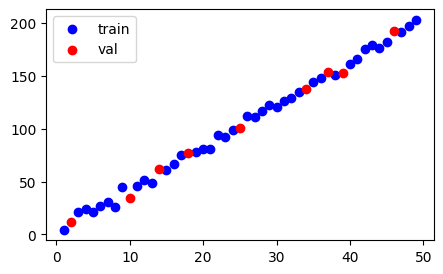

In [36]:
x = np.arange(1,50)
n = x.shape[0]
m = 4
b = 3
noise = np.random.randn(n)*4
y = m*x+b + noise
print('X.shape: ',x.shape)
print('y.shape: ', y.shape)

# Divide dataset into train and val
val_percent = 0.2
all_indices = list(range(n))

val_indices = random.sample(all_indices, int(n*val_percent))
train_indices = list(set(all_indices).difference(set(val_indices)))

X_train, y_train = x[train_indices], y[train_indices]
X_val, y_val = x[val_indices], y[val_indices]

plt.figure(figsize = (5,3))
plt.scatter(X_train,y_train, color ='blue', label = 'train')
plt.scatter(X_val,y_val, color ='red', label = 'val')
plt.legend()
plt.show()

Slope:  4.022535779848848
Intercept:  2.400450122116908
Test MSE:  19.76808341957062


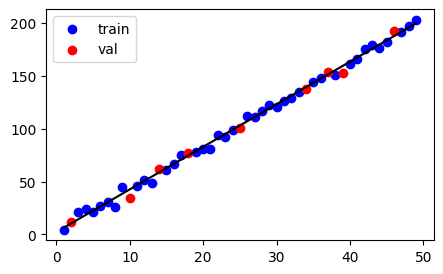

In [37]:
# Initalize model
model = SimpleLinearRegression()
# fit the model
model.fit(X_train,y_train)
# see the params found
print('Slope: ', model.slope)
print('Intercept: ', model.intercept)
# get_preds
y_preds = model.predict(X_val)
# check error
test_error = model.pred_error(y_preds, y_val)
print('Test MSE: ', test_error)

# print line of best fit
xmin = np.min(x); ymin = model.slope * xmin + model.intercept
xmax = np.max(x); ymax = model.slope * xmax + model.intercept

plt.figure(figsize = (5,3))
plt.plot([xmin, xmax], [ymin, ymax], color='black')
plt.scatter(X_train,y_train, color ='blue', label = 'train')
plt.scatter(X_val,y_val, color ='red', label = 'val')
plt.legend()
plt.show()

### Multiple Linear Regression in Closed form

- theta = (X^T X)-1 XTy
- this has x0 = 1

<img src="imgs/LR-closed.jpg" alt="Linear Regression with GD" style="width:400px;"/>


In [38]:
class LinearRegressionClosedForm:
    def __init__(self):
        self.theta = None
    def fit(self,X,y):
        self.theta = np.linalg.pinv(X.T @ X)@X.T@y
        # use pinv instead of inv is X.T X is non-invertible
        # pinv making a HUGE differene in output

    def predict(self,x_test):
        y_hat = x_test@self.theta
        return y_hat

    def pred_error(self, y_pred, y_test):
        mse = np.mean((y_test-y_pred)**2)
        return mse


In [2]:
X1 = np.linspace(start=1,stop=41, num=100); print('X1.shape', X1.shape)
X2 = np.linspace(start=5,stop=45, num=100); print('X2.shape', X2.shape)
# X1 and X2 needs to be of same size

n = X1.shape[0]
m1 = 3
m2 = 4.5
b1 = 4
b2 = 6
noise = np.random.randn()*0

x0 = np.ones_like(X1); print('x0.shape', x0.shape)

# Multiple Linear Regression
X = np.stack([x0, X1, X2], axis=1); print('X.shape', X.shape)
y = m1*X1 + b1 + m2*X2 + b2 + noise; print('y.shape', y.shape)

# # Simple Linear Regression
# X = np.stack([x0, X1], axis=1); print('X.shape', X.shape)
# y = m1*X1 + b1 + noise; print('y.shape', y.shape)

# Divide dataset into train and val
val_percent = 0.2
all_indices = list(range(n))

val_indices = random.sample(all_indices, int(n*val_percent))
train_indices = list(set(all_indices).difference(set(val_indices)))

X_train, y_train = X[train_indices], y[train_indices]
X_val, y_val = X[val_indices], y[val_indices]

print(f'X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape} ')
print(f'X_val.shape: {X_val.shape}, y_val.shape: {y_val.shape} ')

X1.shape (100,)
X2.shape (100,)
x0.shape (100,)
X.shape (100, 3)
y.shape (100,)
X_train.shape: (80, 3), y_train.shape: (80,) 
X_val.shape: (20, 3), y_val.shape: (20,) 


In [40]:
# Initalize model
model = LinearRegressionClosedForm()
# fit the model
model.fit(X_train,y_train)
# see the params found
print('theta: ', model.theta)
print('theta.shape: ', model.theta.shape)
# get_preds
y_preds = model.predict(X_val)
for gt,pred in zip(y_val, y_preds):
    print('GT: Pred -> ', gt,'->', pred)

# check error
test_error = model.pred_error(y_preds, y_val)
print('Test MSE: ', test_error)

theta:  [1.44444444 0.86111111 6.63888889]
theta.shape:  (3,)
GT: Pred ->  65.80303030303031 -> 65.80303030302905
GT: Pred ->  235.5 -> 235.4999999999974
GT: Pred ->  305.1969696969697 -> 305.19696969696656
GT: Pred ->  223.37878787878788 -> 223.37878787878537
GT: Pred ->  162.77272727272725 -> 162.77272727272523
GT: Pred ->  290.0454545454545 -> 290.0454545454515
GT: Pred ->  114.2878787878788 -> 114.28787878787715
GT: Pred ->  274.8939393939394 -> 274.8939393939365
GT: Pred ->  277.92424242424244 -> 277.92424242423954
GT: Pred ->  159.74242424242422 -> 159.74242424242223
GT: Pred ->  44.59090909090909 -> 44.590909090907985
GT: Pred ->  141.56060606060606 -> 141.56060606060421
GT: Pred ->  180.95454545454547 -> 180.95454545454328
GT: Pred ->  77.92424242424244 -> 77.92424242424107
GT: Pred ->  123.37878787878788 -> 123.37878787878616
GT: Pred ->  244.59090909090907 -> 244.5909090909064
GT: Pred ->  262.77272727272725 -> 262.7727272727244
GT: Pred ->  247.62121212121212 -> 247.62121212

### Multiple Linear Regression with Gradient Descent over expression derived from GLMs

<img src="imgs/LR-GD.jpg" alt="Linear Regression with GD" style="width:500px;"/>


In [41]:
class LinearRegressionGLM:
    def __init__(self):
        self.theta = None

    def fit(self, X, y, lr=0.0001, epochs=100):
        # init params
        self.theta = np.random.randn(X.shape[1]) # shape: (X.shape[1],)
        n = y.shape[0]
        for epoch in range(epochs):
            y_hat = X@self.theta
            self.theta = self.theta - (lr/n)*(X.T@(y_hat-y)) # Chance of error: lr -> lr/n for averaging across training data

    def predict(self,x_test):
        y_hat = x_test@self.theta
        return y_hat

    def pred_error(self, y_pred, y_test):
        mse = np.mean((y_test-y_pred)**2)
        return mse



In [42]:
# Initalize model
model = LinearRegressionGLM()
# fit the model
model.fit(X_train,y_train, lr=0.001, epochs=1000)
# see the params found
print('theta: ', model.theta)
print('theta.shape: ', model.theta.shape)
# get_preds
y_preds = model.predict(X_val)
for gt,pred in zip(y_val, y_preds):
    print('GT: Pred -> ', gt,'->', pred)

# check error
test_error = model.pred_error(y_preds, y_val)
print('Test MSE: ', test_error)

theta:  [1.77732462 1.36135826 6.19231142]
theta.shape:  (3,)
GT: Pred ->  65.80303030303031 -> 64.62011751728676
GT: Pred ->  235.5 -> 235.5314315872057
GT: Pred ->  305.1969696969697 -> 305.7271498659224
GT: Pred ->  223.37878787878788 -> 223.3234805822115
GT: Pred ->  162.77272727272725 -> 162.28372555724042
GT: Pred ->  290.0454545454545 -> 290.4672111096796
GT: Pred ->  114.2878787878788 -> 113.45192153726359
GT: Pred ->  274.8939393939394 -> 275.20727235343685
GT: Pred ->  277.92424242424244 -> 278.25926010468544
GT: Pred ->  159.74242424242422 -> 159.23173780599186
GT: Pred ->  44.59090909090909 -> 43.256203258546876
GT: Pred ->  141.56060606060606 -> 140.91981129850058
GT: Pred ->  180.95454545454547 -> 180.59565206473175
GT: Pred ->  77.92424242424244 -> 76.82806852228096
GT: Pred ->  123.37878787878788 -> 122.60788479100924
GT: Pred ->  244.59090909090907 -> 244.68739484095133
GT: Pred ->  262.77272727272725 -> 262.9993213484426
GT: Pred ->  247.62121212121212 -> 247.73938259

### Multiple Linear Regression with Batch Gradient Descent over any Loss

__theta = theta - lr*dLoss_dtheta__

In [3]:
class LinearRegressionBGD:
    def __init__(self):
        self.theta = None
        
    def fit(self, X, y, lr = 0.01, epochs = 1000):
        n, d = X.shape
        self.theta = np.random.randn(d)
        for epoch in range(epochs):
            y_hat = X @ self.theta
            loss = self.mse(y_hat,y)
            dL_dtheta = self.mse_derivative(X,y,y_hat)
            self.theta = self.theta - lr * dL_dtheta
            if epoch%50 == 0:
                print(f"epoch: {epoch}, train_loss: {loss}")
        return self.theta

    def mse(self, y_hat, y):
        return np.mean((y_hat - y)**2)/2  # for 1/2n * (y-y_hat)**2
        
    def mse_derivative(self, X, y, y_hat):
        dL_dtheta = (X.T @ (y_hat-y))/ len(y)
        return dL_dtheta
        
    def predict(self, X):
        return X@self.theta

In [5]:
model = LinearRegressionBGD()
theta = model.fit(X_train, y_train, lr = 0.001, epochs = 500)
y_preds = model.predict(X_val)
print()
for gt, pred in zip(y_val, y_preds):
    print(f"{round(gt,2)} ---> {round(pred,2)}")

epoch: 0, train_loss: 40741.28477863934
epoch: 50, train_loss: 3.269179066478896
epoch: 100, train_loss: 2.7427746914371385
epoch: 150, train_loss: 2.301132135931165
epoch: 200, train_loss: 1.930603021657825
epoch: 250, train_loss: 1.6197366370384878
epoch: 300, train_loss: 1.3589260681421083
epoch: 350, train_loss: 1.1401113097328097
epoch: 400, train_loss: 0.9565301814820499
epoch: 450, train_loss: 0.802509351740851

268.83 ---> 269.14
174.89 ---> 174.4
141.56 ---> 140.79
244.59 ---> 244.69
38.53 ---> 36.89
114.29 ---> 113.29
90.05 ---> 88.84
283.98 ---> 284.41
80.95 ---> 79.67
77.92 ---> 76.62
165.8 ---> 165.24
332.47 ---> 333.31
168.83 ---> 168.29
241.56 ---> 241.63
177.92 ---> 177.46
71.86 ---> 70.51
135.5 ---> 134.68
317.32 ---> 318.03
87.02 ---> 85.79
126.41 ---> 125.51


Above is Batch Gradient Descent Implementation which can be slow for large sized arrays
### Multiple Linear Regression with Mini-batch GD

__theta = theta - lr*dLoss_dtheta__ for each mini-batches of training example

In [57]:
class LinearRegressionMGD:
    def __init__(self):
        self.theta = None
        
    def fit(self, X, y, lr = 0.01, epochs = 1000, bs = 8):
        n, d = X.shape
        self.theta = np.random.randn(d)
        mini_batches = n//bs if n%bs == 0 else n//bs + 1
        for epoch in range(epochs):
            epoch_loss = 0
            for i in range(mini_batches):
                batch_end = min((i+1)*bs,n)
                xx = X[i*bs:batch_end,:]
                yy = y[i*bs:batch_end]
                yy_hat = xx @ self.theta
                loss = self.mse(yy_hat,yy)
                epoch_loss += loss.item()
                dL_dtheta = self.mse_derivative(xx,yy,yy_hat)
                self.theta = self.theta - lr * dL_dtheta
            if epoch%50 == 0:
                print(f"epoch: {epoch}, train_loss: {loss}")
        return self.theta

    def mse(self, y_hat, y):
        return np.mean((y_hat - y)**2)/2
        
    def mse_derivative(self, X, y, y_hat):
        dL_dtheta = (X.T @ (y_hat-y))/len(y)
        return dL_dtheta
        
    def predict(self, X):
        return X@self.theta

In [58]:
model = LinearRegressionMGD()
theta = model.fit(X_train, y_train, lr = 0.0001, epochs=500, bs = 8)
y_preds = model.predict(X_val)
print()
for gt, pred in zip(y_val, y_preds):
    print(f"{round(gt,2)} ---> {round(pred,2)}")

epoch: 0, train_loss: 3016.893085713262
epoch: 50, train_loss: 7.482524395578595
epoch: 100, train_loss: 6.258141599005826
epoch: 150, train_loss: 5.2341073951391035
epoch: 200, train_loss: 4.377638279741499
epoch: 250, train_loss: 3.6613151893013924
epoch: 300, train_loss: 3.062205705173291
epoch: 350, train_loss: 2.561129893486506
epoch: 400, train_loss: 2.1420462773708255
epoch: 450, train_loss: 1.7915382839688372

268.83 ---> 268.86
174.89 ---> 172.91
141.56 ---> 138.87
244.59 ---> 244.1
38.53 ---> 33.64
114.29 ---> 111.01
90.05 ---> 86.25
283.98 ---> 284.33
80.95 ---> 76.97
77.92 ---> 73.87
165.8 ---> 163.63
332.47 ---> 333.85
168.83 ---> 166.72
241.56 ---> 241.0
177.92 ---> 176.01
71.86 ---> 67.68
135.5 ---> 132.68
317.32 ---> 318.37
87.02 ---> 83.16
126.41 ---> 123.39


Above is Batch Gradient Descent Implementation which can be slow for large sized arrays
### Multiple Linear Regression with Stochastic GD 
- SGD means set `bs` = 1 in above

__theta = theta - lr*dLoss_dtheta__ for each mini-batches of training example

In [59]:
model = LinearRegressionMGD()
theta = model.fit(X_train, y_train, lr = 0.0001, epochs=500, bs = 1)
y_preds = model.predict(X_val)
print()
for gt, pred in zip(y_val, y_preds):
    print(f"{round(gt,2)} ---> {round(pred,2)}")

epoch: 0, train_loss: 0.0713423231458439
epoch: 50, train_loss: 0.025154508379820605
epoch: 100, train_loss: 0.008803050573380652
epoch: 150, train_loss: 0.0030807081668021057
epoch: 200, train_loss: 0.0010781220362053924
epoch: 250, train_loss: 0.0003772986800497637
epoch: 300, train_loss: 0.0001320391283968946
epoch: 350, train_loss: 4.620830220211961e-05
epoch: 400, train_loss: 1.6171018532566254e-05
epoch: 450, train_loss: 5.659196030311171e-06

268.83 ---> 268.82
174.89 ---> 174.87
141.56 ---> 141.53
244.59 ---> 244.58
38.53 ---> 38.49
114.29 ---> 114.25
90.05 ---> 90.01
283.98 ---> 283.98
80.95 ---> 80.92
77.92 ---> 77.89
165.8 ---> 165.78
332.47 ---> 332.47
168.83 ---> 168.81
241.56 ---> 241.55
177.92 ---> 177.9
71.86 ---> 71.82
135.5 ---> 135.47
317.32 ---> 317.32
87.02 ---> 86.98
126.41 ---> 126.38


__Observations:__
1. When moved from Batch GD -> Mini-batch GD -> SGD, lr requirement reduces
2. SGD converged lot lot faster than MGD

#### Now let's apply regularization 
- L1
- L2

In [60]:
class LinearRegressionMGD_L1:
    def __init__(self):
        self.theta = None
        
    def fit(self, X, y, lr = 0.01, epochs = 1000, bs = 8, regularization = 'L1', lamda1 = 0.1):
        self.regularization = regularization
        self.lamda1 = lamda1
        n, d = X.shape
        self.theta = np.random.randn(d)
        mini_batches = n//bs if n%bs == 0 else n//bs + 1
        for epoch in range(epochs):
            epoch_loss = 0
            for i in range(mini_batches):
                batch_end = min((i+1)*bs,n)
                xx = X[i*bs:batch_end,:]
                yy = y[i*bs:batch_end]
                yy_hat = xx @ self.theta
                loss = self.mse(yy_hat,yy)
                epoch_loss += loss.item()
                dL_dtheta = self.mse_derivative(xx,yy,yy_hat)
                self.theta = self.theta - lr * dL_dtheta
            if epoch%50 == 0:
                print(f"epoch: {epoch}, train_loss: {loss}")
        return self.theta

    def mse(self, y_hat, y):
        if self.regularization == 'L1':
            return np.mean((y_hat - y)**2)/2 + self.lamda1*np.sum(np.abs(self.theta))
        else:
            return np.mean((y_hat - y)**2)/2
        
    def mse_derivative(self, X, y, y_hat):
        dL_dtheta = (X.T @ (y_hat-y))/len(y)
        if self.regularization == 'L1':
            dL_dtheta += self.lamda1*np.sign(self.theta)
        return dL_dtheta
        
    def predict(self, X):
        return X@self.theta

In [61]:
model = LinearRegressionMGD_L1()
theta = model.fit(X_train, y_train, lr = 0.0001, epochs=500, bs=8, regularization='L1',lamda1=0.1)
y_preds = model.predict(X_val)
print()
for gt, pred in zip(y_val, y_preds):
    print(f"{round(gt,2)} ---> {round(pred,2)}")

epoch: 0, train_loss: 2315.5461428943413
epoch: 50, train_loss: 3.57482836339525
epoch: 100, train_loss: 3.139808085945719
epoch: 150, train_loss: 2.7761678993182244
epoch: 200, train_loss: 2.4722046852078874
epoch: 250, train_loss: 2.2181323018953356
epoch: 300, train_loss: 2.005767736706614
epoch: 350, train_loss: 1.8282686284500738
epoch: 400, train_loss: 1.6799137528139207
epoch: 450, train_loss: 1.5559194394711966

268.83 ---> 268.84
174.89 ---> 173.69
141.56 ---> 139.93
244.59 ---> 244.29
38.53 ---> 35.57
114.29 ---> 112.3
90.05 ---> 87.75
283.98 ---> 284.19
80.95 ---> 78.54
77.92 ---> 75.47
165.8 ---> 164.48
332.47 ---> 333.3
168.83 ---> 167.55
241.56 ---> 241.22
177.92 ---> 176.76
71.86 ---> 69.33
135.5 ---> 133.79
317.32 ---> 317.95
87.02 ---> 84.68
126.41 ---> 124.58


#### Add __L2 regularization__ and __Elasticnet regularization__

In [62]:
class LinearRegressionMGD_Regularized:
    def __init__(self, init_weights, regularization = 'L1', lamda1 = 0.1, lamda2 = 0.1, alpha1 = 0.1 ):
        self.theta = init_weights
        self.regularization = regularization
        self.lamda1 = lamda1
        self.lamda2 = lamda2
        self.alpha1 = alpha1
        
    def fit(self, X, y, lr = 0.01, epochs = 1000, bs = 8):
        n, d = X.shape
        #self.theta = np.random.randn(d)
        mini_batches = n//bs if n%bs == 0 else n//bs + 1
        for epoch in range(epochs):
            epoch_loss = 0
            for i in range(mini_batches):
                batch_end = min((i+1)*bs,n)
                xx = X[i*bs:batch_end,:]
                yy = y[i*bs:batch_end]
                yy_hat = xx @ self.theta
                loss = self.mse(yy_hat,yy)
                epoch_loss += loss.item()
                dL_dtheta = self.mse_derivative(xx,yy,yy_hat)
                self.theta = self.theta - lr * dL_dtheta
            if (epoch+1)%10 == 0:
                print(f"epoch: {epoch+1}, train_loss: {loss}")
        return self.theta

    def mse(self, y_hat, y):
        if self.regularization == 'L1':
            penalty = self.lamda1*np.sum(np.abs(self.theta))
            return np.mean((y_hat - y)**2)/2 + penalty
        elif self.regularization == 'L2':
            penalty = self.lamda2*np.sum(self.theta**2)
            return np.mean((y_hat - y)**2)/2 + penalty
        elif self.regularization == 'Elasticnet':
            weighted_penalty = self.alpha1* self.lamda1*np.sum(np.abs(self.theta)) + (1-self.alpha1)*self.lamda2*np.sum(self.theta.T**2)
            return np.mean((y_hat - y)**2)/2 + weighted_penalty
        else:
            return np.mean((y_hat - y)**2)/2
        
    def mse_derivative(self, X, y, y_hat):
        dL_dtheta = (X.T @ (y_hat-y))/ len(y) 
        if self.regularization == 'L1':
            dL_dtheta += self.lamda1 * np.sign(self.theta)
        elif self.regularization == 'L2':
            dL_dtheta += 2 * self.lamda2 * self.theta
        elif self.regularization == 'Elasticnet':
            dL_dtheta += self.alpha1 * self.lamda1 * np.sign(self.theta) + \
                         (1 - self.alpha1) * 2 * self.lamda2 * self.theta
        return dL_dtheta
        
    def predict(self, X):
        return X@self.theta

__Let's observe impact of different types of Regularization when model is initialized the same__

In [63]:
init_weights = np.random.randn(X_train.shape[1])

weights_dict = {}

model = LinearRegressionMGD_Regularized(init_weights = init_weights, regularization='L1',lamda1=0.1)
theta = model.fit(X_train, y_train, lr = 0.0001, epochs=10, bs=8)
y_preds = model.predict(X_val)
weights_dict['L1'] = theta
print()

model = LinearRegressionMGD_Regularized(init_weights = init_weights, regularization='L2',lamda2=0.1)
theta = model.fit(X_train, y_train, lr = 0.0001, epochs=10, bs=8)
y_preds = model.predict(X_val)
weights_dict['L2'] = theta
print()

model = LinearRegressionMGD_Regularized(init_weights = init_weights, regularization='Elasticnet',lamda1=0.1, lamda2=0.1, alpha1=0.5)
theta = model.fit(X_train, y_train, lr = 0.0001, epochs=10, bs=8)
weights_dict['Elastic'] = theta
y_preds = model.predict(X_val)

epoch: 10, train_loss: 6.939439103934874

epoch: 10, train_loss: 9.190242040791583

epoch: 10, train_loss: 8.064886999319636


In [64]:
weights_dict

{'L1': array([-0.66275327,  3.23353082,  4.58875854]),
 'L2': array([-0.66217778,  3.2340638 ,  4.58762088]),
 'Elastic': array([-0.66246538,  3.23379749,  4.58818951])}

__Let's observe impact of different values of `lamda1` in `L1` Regularization when model is initialized the same__

In [79]:
init_weights = np.random.randn(X_train.shape[1])

weights_dict = {}

model = LinearRegressionMGD_Regularized(init_weights = init_weights, regularization='L1',lamda1=0.1)
theta = model.fit(X_train, y_train, lr = 0.0001, epochs=100, bs=8)
y_preds = model.predict(X_val)
weights_dict[0.1] = np.round(theta,3)
print()

model = LinearRegressionMGD_Regularized(init_weights = init_weights, regularization='L1',lamda1=10)
theta = model.fit(X_train, y_train, lr = 0.0001, epochs=100, bs=8)
y_preds = model.predict(X_val)
weights_dict[10] = np.round(theta,3)
print()

model = LinearRegressionMGD_Regularized(init_weights = init_weights, regularization='L1',lamda1=1000)
theta = model.fit(X_train, y_train, lr = 0.0001, epochs=100, bs=8)
weights_dict[1000] = np.round(theta,3)
y_preds = model.predict(X_val)

print('Final results: \n')
weights_dict

epoch: 10, train_loss: 5.920859890570223
epoch: 20, train_loss: 5.736951895341615
epoch: 30, train_loss: 5.559285351402725
epoch: 40, train_loss: 5.387836490793091
epoch: 50, train_loss: 5.222387324170967
epoch: 60, train_loss: 5.0627275098298385
epoch: 70, train_loss: 4.908654085333505
epoch: 80, train_loss: 4.759971208547345
epoch: 90, train_loss: 4.619024356494699
epoch: 100, train_loss: 4.485685961174973

epoch: 10, train_loss: 82.15366870116148
epoch: 20, train_loss: 81.40960646517179
epoch: 30, train_loss: 81.20035140403783
epoch: 40, train_loss: 81.00049285218819
epoch: 50, train_loss: 80.8073526747799
epoch: 60, train_loss: 80.62257324799583
epoch: 70, train_loss: 80.44251615780794
epoch: 80, train_loss: 80.26587643834547
epoch: 90, train_loss: 80.09242510249575
epoch: 100, train_loss: 79.9268569654515

epoch: 10, train_loss: 7710.594388933325
epoch: 20, train_loss: 7619.567071858782
epoch: 30, train_loss: 7594.187814497478
epoch: 40, train_loss: 7606.041607105273
epoch: 50, tr

{0.1: array([0.025, 2.769, 4.982]),
 10: array([1.000e-03, 2.706e+00, 5.030e+00]),
 1000: array([-0.047,  0.319,  6.271])}


<a href="https://github.com/mgupta70/literature/blob/main/Linear%20Regression.pdf"> Click here</a> for for intriguing __Q&A__ on Linear Regression :)
